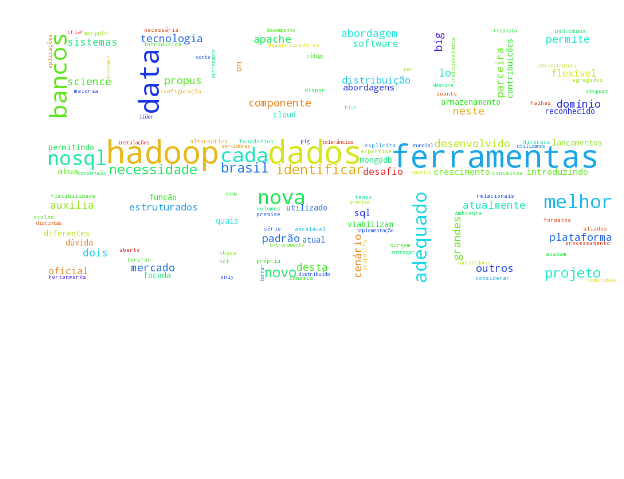

In [20]:
from os import path
import re
from PIL import Image
import numpy as np
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

data = {}

data['blog'] = open('nosql.txt','r').read()

for k in data.keys():
    data[k] = data[k].lower()
    
# Remove pontuacao
for k in data.keys():
    data[k] = re.sub(r'[-./?!,":;()\']',' ',data[k])
    
# Remove numeros
for k in data.keys():
    data[k] = re.sub('[-|0-9]',' ',data[k])
    

# Stopwords em portugues
stopwords = nltk.corpus.stopwords.words('portuguese')

for k in data.keys():
    data[k] = data[k].split()
    
for k in data.keys():
    data[k] = [ w for w in data[k] if not w in stopwords ]
    
 
text = ' '.join(data['blog'])


mask = np.array(Image.open(path.join("propus_mask.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=mask,
               stopwords=stopwords)

wc.generate(text)


plt.figure(figsize=(15,8))

plt.imshow(wc)
    
plt.axis("off")

plt.show()